Populating the interactive namespace from numpy and matplotlib
[-180. -150. -120.  -90.  -60.  -30.    0.   30.   60.   90.  120.  150.
  180.]


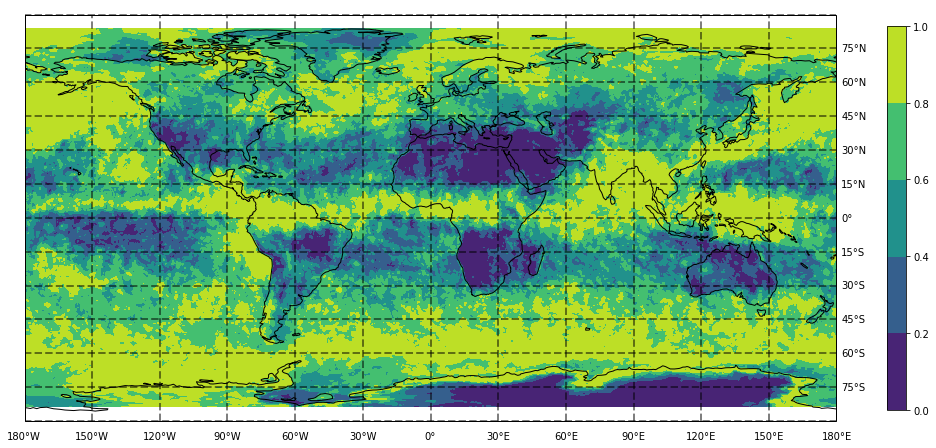

In [11]:
%pylab inline
from numpy import * 
from math import *
import os,sys
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

figpath = '/group_workspaces/cems2/nceo_generic/CCI_LAND/figs/'
#retrieve data from the folder. I saved the .nc file to the same folder as the one this .py script is saved to
#so I don't need to located it
filein = '/group_workspaces/cems/cloud_ecv/public/ESA_Cloud_CCI/CLD_PRODUCTS/L3C/AATSR_ENVISAT/v2.0/2008/200806-ESACCI-L3C_CLOUD-CLD_PRODUCTS-AATSR_ENVISAT-fv2.0.nc'

fh = Dataset(filein, mode='r') #reading the data
#print fh.file_format #print the file format of the data I am working on
#print fh.variables['cfc'][:]
lons = fh.variables['lon'][:] #retreive the longitude variables from the data file
lats = fh.variables['lat'][:] #for the latitude variables
cfc = fh.variables['cfc'][0,:] #and for the cfc variables. 
fh.close() 


#change the size of the figure plot (lon,lat)
fig = plt.figure(figsize=(40,30)) 

# Set the GeoAxes to a projection onto a cylinder tangent at the Equator.
ax = plt.axes(projection=ccrs.PlateCarree())

#change_geometry(numrows, numcols, num)
ax.change_geometry(3,2,1)

#labeling the gridlines with just numbers, colouring the line black with the style -- and a linewidth of 2. 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')

#marking on the longitude gridlines. Linspace(start,stop,number of increments)
x = linspace(-180, 180, 13)
print x 
gl.xlocator = mticker.FixedLocator(x) #mark longitude on x axis

#same for latitude 
y = linspace(-90,90,13)
gl.ylocator = mticker.FixedLocator(y)


gl.xlabels_top = False
gl.ylabels_left = False

#creating the contour plot using the lat,lon and cfc variables.
plt.contourf(lons, lats, cfc, 5,
             transform=ccrs.PlateCarree())
#create a colourbar. Shrink indicates the fraction by which to shrink the colourbar
plt.colorbar(ax=ax, shrink=.8)

#x.formatter makes the -ve x values west and positive values east
#y.formatter -ve = south, + = north
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#mark on coastlines 
ax.coastlines()

#show the plot
plt.show()

plt.savefig(figpath + 'cfc_june_08.pdf')
#30 longitude 15 latitude 
#This is a good webpage giving information to do different plots
#http://wrf-python.readthedocs.io/en/latest/plot.html


Populating the interactive namespace from numpy and matplotlib
NETCDF4
AOD_mean =
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]
latitudes =
[-89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5
 -77.5 -76.5 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5
 -65.5 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5
 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5
 -41.5 -40.5 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5
 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5
 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5
  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5
   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5
  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5
  30.5  31.5

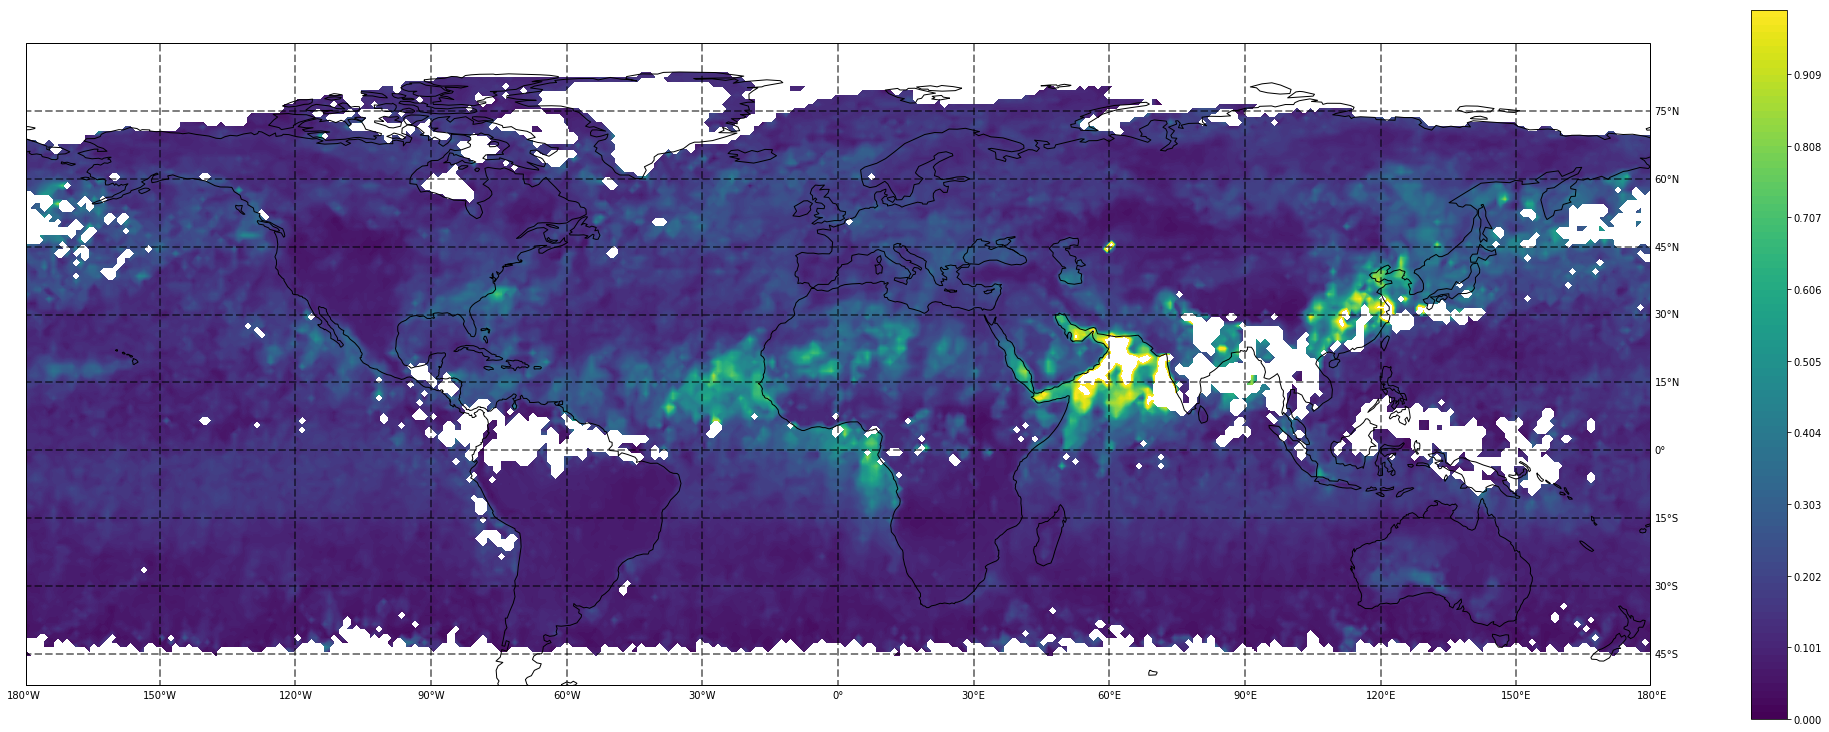

[[0.08869840204715729]]
(array([116]),) (array([78]),)


In [10]:
#AOD550_mean
%pylab inline 
from numpy import * 
from math import *
import os,sys
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.backends.backend_pdf import PdfPages

figpath = '/group_workspaces/cems2/nceo_generic/CCI_LAND/figs/'

#retrieve data from the folder. I saved the .nc file to the same folder as the one this .py script is saved to
#so I don't need to located it
Aero_data = '/group_workspaces/cems/aerosol_cci/public/cci_products/AATSR_ORAC_v04-01/L3_MONTHLY/2008/200806-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc'
readfile = Dataset(Aero_data, mode='r') #reading the data
print readfile.file_format
#print readfile.variables['AOD550_mean']
lons = readfile.variables['longitude'][:] #retreive the longitude variables from the data file
lats = readfile.variables['latitude'][:] #for the latitude variables
AOD_mean = readfile.variables['AOD550_mean'][:,:]  
readfile.close() 
print "AOD_mean =\n",AOD_mean[:,:]
print "latitudes =\n",lats[:]
print "longitudes =\n",lats[:]
#get the units for AOD_mean
#AOD_mean_units = readfile.variables['AOD550_mean'].units


#change the size of the figure plot (lon,lat)
fig = plt.figure(figsize=(80,60)) 

# Set the GeoAxes to a projection onto a cylinder tangent at the Equator.
ax = plt.axes(projection=ccrs.PlateCarree())

#change_geometry(numrows, numcols, num)
ax.change_geometry(4,2,1)

#labeling the gridlines with just numbers, colouring the line black with the style -- and a linewidth of 2. 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')

#marking on the longitude gridlines. Linspace(start,stop,number of increments)
x = linspace(-180, 180, 13)
#print x 
gl.xlocator = mticker.FixedLocator(x) #mark longitude on x axis

#same for latitude 
y = linspace(-90,90,13)
gl.ylocator = mticker.FixedLocator(y)


gl.xlabels_top = False
gl.ylabels_left = False

#creating the contour plot using the lat,lon and AOD_mean variables.
levels = linspace(0,1,100)
plot = plt.contourf(lons, lats, AOD_mean, levels, 
             transform=ccrs.PlateCarree())

#create a colourbar. Shrink indicates the fraction by which to shrink the colourbar

#plt.pcolor(lons, lats, AOD_mean, cmap='cool')
colourbar = plt.colorbar(plot)
#x.formatter makes the -ve x values west and positive values east
#y.formatter -ve = south, + = north
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#mark on coastlines 
ax.coastlines()

plt.savefig( figpath + 'aerosol.pdf')

#show the plot
plt.show()

coordlon = np.where(lons == -63.5)
coordlat = np.where(lats == -11.5)
print AOD_mean[coordlon,coordlat]

print coordlon, coordlat